<a href="https://colab.research.google.com/github/adinugrahadharmaputra/CaseBased2MachineLearning-/blob/main/Case_Based_2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 

In [ ]:
source = pd.read_csv("https://github.com/adinugrahadharmaputra/CaseBased2MachineLearning-/blob/main/Country-data.csv?raw=true", index_col = "country")

In [ ]:
df = source.copy()

In [ ]:
df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


#eksplorasi data

In [ ]:
df.dtypes

child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [ ]:
df.shape

(167, 9)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


##Fungsi yang digunakan

In [ ]:
def floatData(inpdata):
    count=0
    row,col = inpdata.shape
    for i in range(row):
        for j in range(col):
            if type(inpdata.iloc[i,j]) == np.float64 :
                # print (type(df.iloc[i,j]))
                # print(df.iloc[i,j])
                count =count+1
    return (count)

In [ ]:
def intData(inpdata):
    count=0
    row,col = inpdata.shape
    for i in range(row):
        for j in range(col):
            if type(inpdata.iloc[i,j]) == np.int64 :
                # print (type(df.iloc[i,j]))
                # print(df.iloc[i,j])
                count =count+1
    return (count)

In [ ]:
def strData(inpdata):
    count=0
    row,col = inpdata.shape
    for i in range(row):
        for j in range(col):
            if type(inpdata.iloc[i,j]) == str :
                # print (type(df.iloc[i,j]))
                # print(df.iloc[i,j])
                count =count+1
    return count

##Komposisi data

In [ ]:
strDatas = (strData(df))
floatDatas = (floatData(df))
intDatas =(intData(df))
print("data string : ",strDatas)
print("data float : ",floatDatas)
print("data int : ", intDatas)

recognized = strDatas+floatDatas+intDatas

print( "total recognized data types :",recognized)
total = df.shape[0]*df.shape[1]
print("total data :", total)
print("null data :", total - recognized)

data string :  0
data float :  1169
data int :  334
total recognized data types : 1503
total data : 1503
null data : 0


##visualization

In [ ]:
def boxPlot(df):
    inp = df._get_numeric_data()
    rowsize,colsize = inp.shape
    fig= plt.figure(figsize=(20,18))
    i =1
    for col in inp:
        axes = fig.add_subplot(3,3,i)
        inp[col].plot(kind='box', fontsize=12,ax =axes)
        axes.grid(True)
        i+=1
    fig.suptitle("Boxplot",fontsize = 20)
    plt.tight_layout(pad=7)
    plt.show()

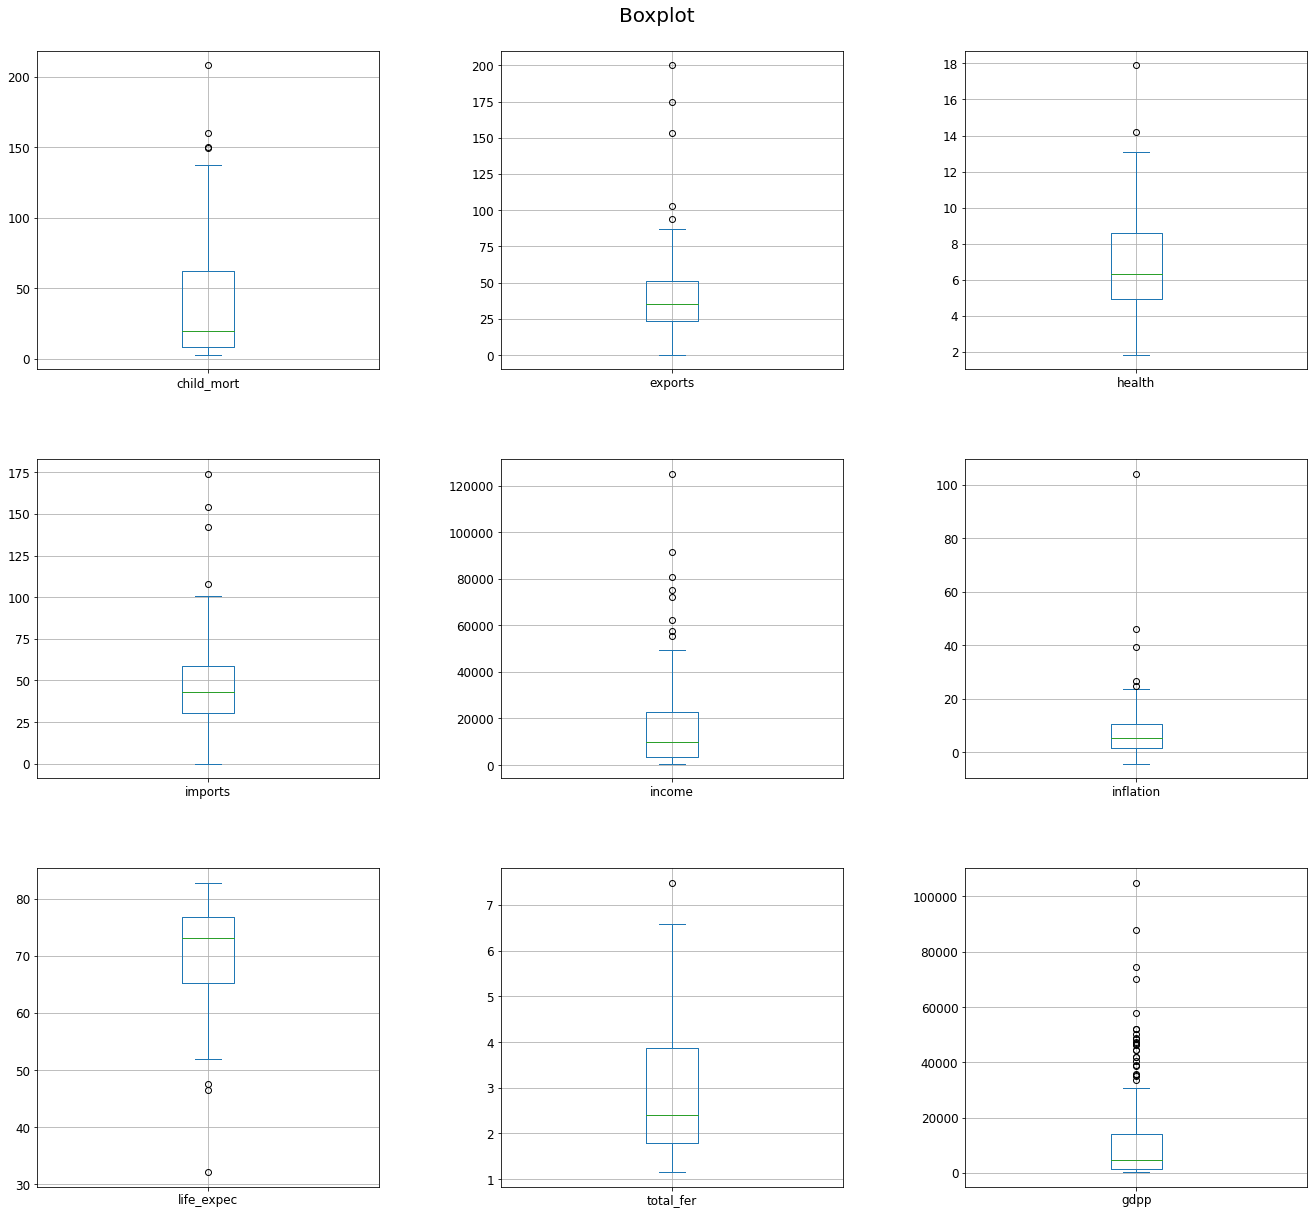

In [ ]:
boxPlot(df)

<function matplotlib.pyplot.show(*args, **kw)>

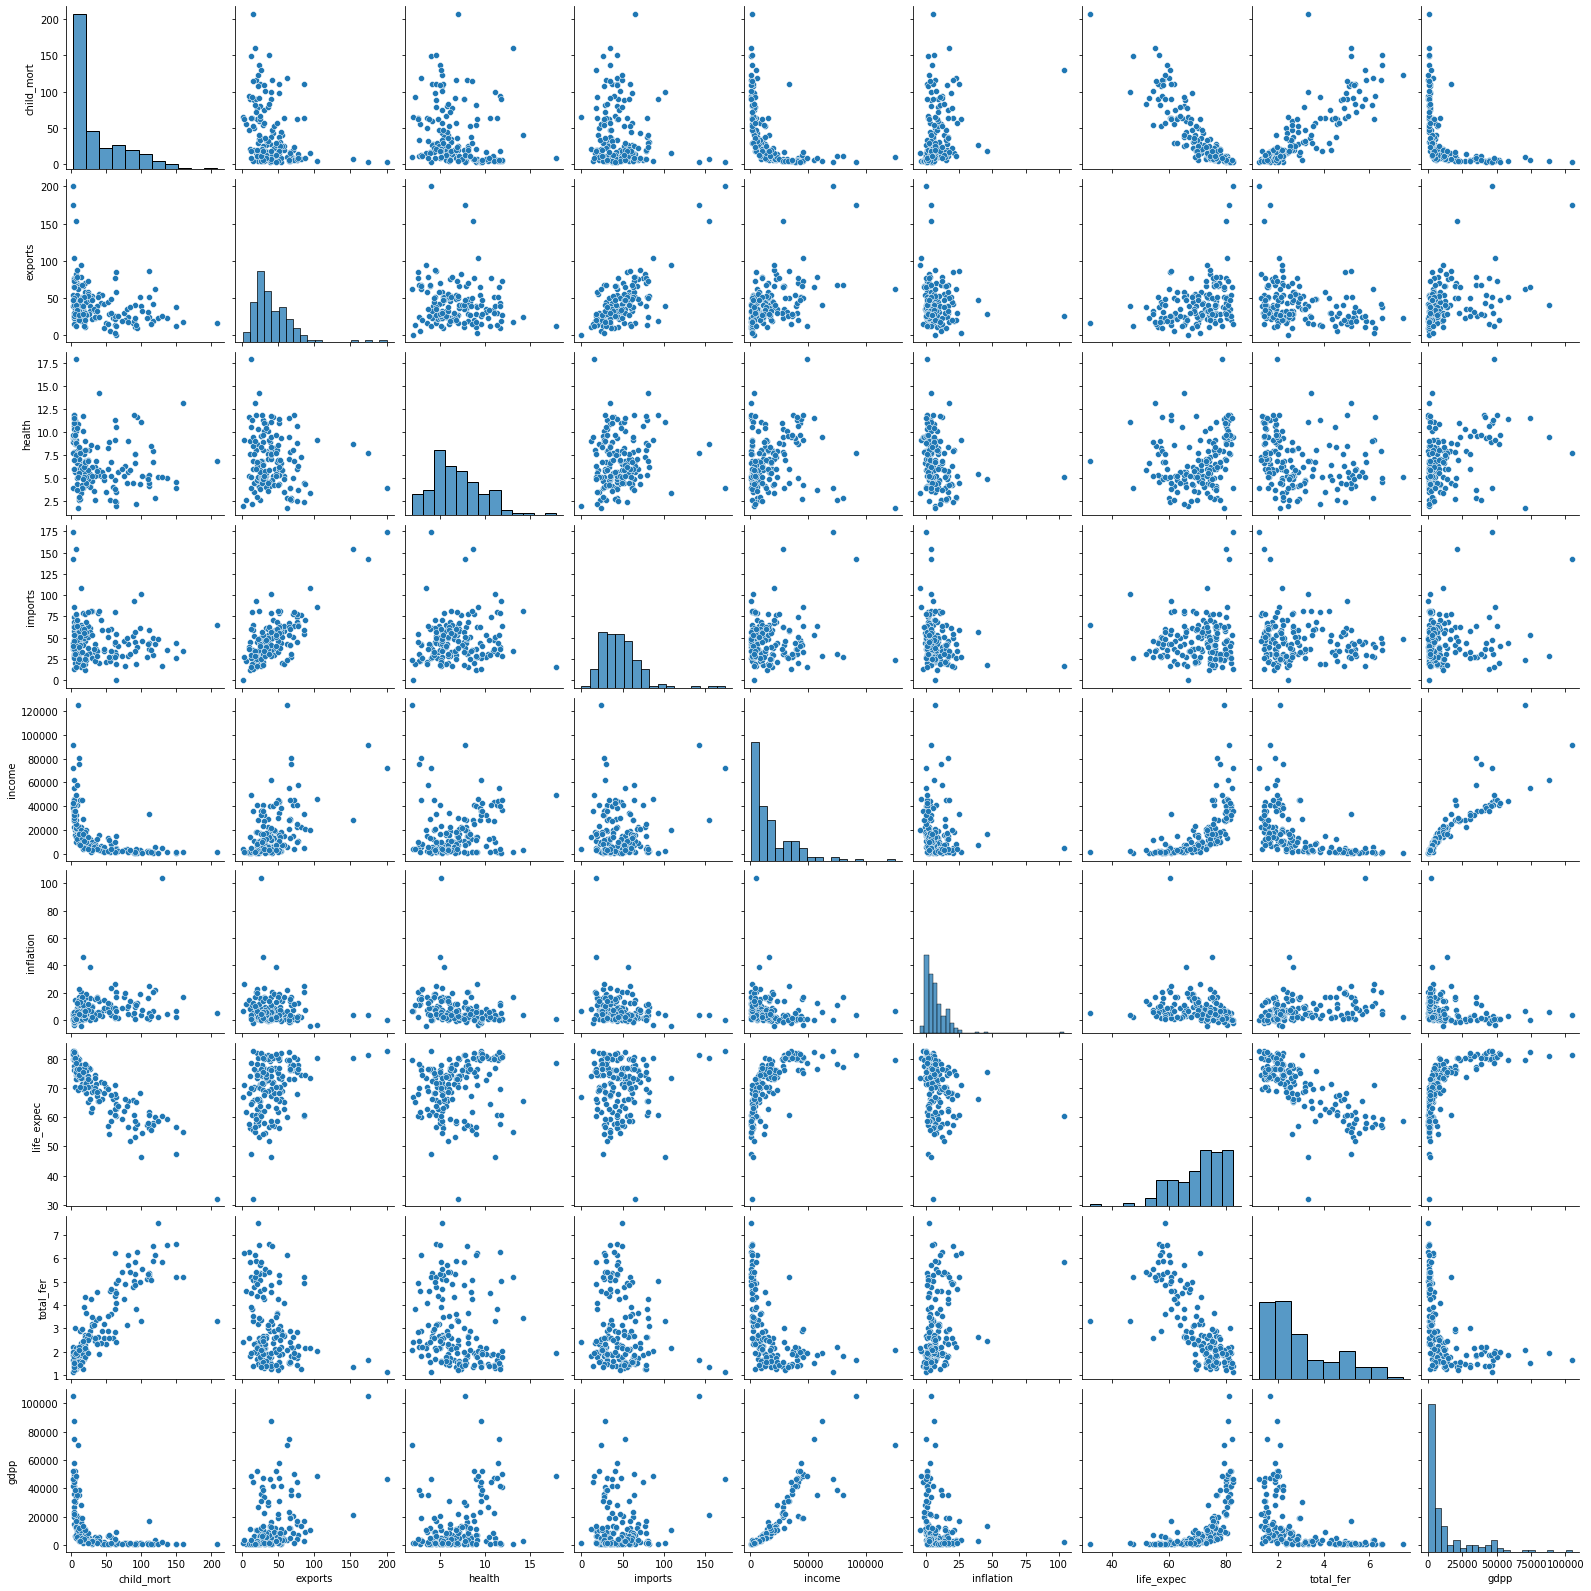

In [ ]:
sns.pairplot(df)
plt.show

In [ ]:
def findOutliersIQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [ ]:
outliers = findOutliersIQR(df)

In [ ]:
print("number of outliers:")
print(len(outliers))
print("max outlier value:" )
print(outliers.max())
print("min outlier value:")
print(outliers.min())
outliers

number of outliers:
167
max outlier value:
child_mort       208.00
exports          200.00
health            17.90
imports          174.00
income        125000.00
inflation        104.00
life_expec        47.50
total_fer          7.49
gdpp          105000.00
dtype: float64
min outlier value:
child_mort      149.00
exports          93.80
health           14.20
imports         108.00
income        55500.00
inflation        24.90
life_expec       32.10
total_fer         7.49
gdpp          33700.00
dtype: float64


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
Vanuatu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Venezuela,NaN,NaN,NaN,NaN,NaN,45.9,NaN,NaN,NaN
Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
rowName = 'child_mort'
outliersCol = outliers[[rowName]].loc[outliers[rowName].notnull()]

In [ ]:
print(f'{rowName} outlier percentage : {outliersCol.shape[0]/df.shape[0]*100}%')
outliersCol

child_mort outlier percentage : 2.3952095808383236%


,child_mort
country,
Central African Republic,149.0
Chad,150.0
Haiti,208.0
Sierra Leone,160.0


In [ ]:
rowName = 'exports'
outliersCol = outliers[[rowName]].loc[outliers[rowName].notnull()]

In [ ]:
print(f'{rowName} outlier percentage : {outliersCol.shape[0]/df.shape[0]*100}%')
outliersCol

exports outlier percentage : 2.9940119760479043%


,exports
country,
Ireland,103.0
Luxembourg,175.0
Malta,153.0
Seychelles,93.8
Singapore,200.0


In [ ]:
rowName = 'health'
outliersCol = outliers[[rowName]].loc[outliers[rowName].notnull()]

In [ ]:
print(f'{rowName} outlier percentage : {outliersCol.shape[0]/df.shape[0]*100}%')
outliersCol

health outlier percentage : 1.1976047904191618%


,health
country,
"Micronesia, Fed. Sts.",14.2
United States,17.9


In [ ]:
rowName = 'imports'
outliersCol = outliers[[rowName]].loc[outliers[rowName].notnull()]

In [ ]:
print(f'{rowName} outlier percentage : {outliersCol.shape[0]/df.shape[0]*100}%')
outliersCol

imports outlier percentage : 2.3952095808383236%


,imports
country,
Luxembourg,142.0
Malta,154.0
Seychelles,108.0
Singapore,174.0


In [ ]:
rowName = 'income'
outliersCol = outliers[[rowName]].loc[outliers[rowName].notnull()]

In [ ]:
print(f'{rowName} outlier percentage : {outliersCol.shape[0]/df.shape[0]*100}%')
outliersCol

income outlier percentage : 4.790419161676647%


,income
country,
Brunei,80600.0
Kuwait,75200.0
Luxembourg,91700.0
Norway,62300.0
Qatar,125000.0
Singapore,72100.0
Switzerland,55500.0
United Arab Emirates,57600.0


In [ ]:
rowName = 'inflation'
outliersCol = outliers[[rowName]].loc[outliers[rowName].notnull()]

In [ ]:
print(f'{rowName} outlier percentage : {outliersCol.shape[0]/df.shape[0]*100}%')
outliersCol

inflation outlier percentage : 2.9940119760479043%


,inflation
country,
Equatorial Guinea,24.9
Mongolia,39.2
Nigeria,104.0
Timor-Leste,26.5
Venezuela,45.9


In [ ]:
rowName = 'life_expec'
outliersCol = outliers[[rowName]].loc[outliers[rowName].notnull()]

In [ ]:
print(f'{rowName} outlier percentage : {outliersCol.shape[0]/df.shape[0]*100}%')
outliersCol

life_expec outlier percentage : 1.7964071856287425%


,life_expec
country,
Central African Republic,47.5
Haiti,32.1
Lesotho,46.5


In [ ]:
rowName = 'total_fer'
outliersCol = outliers[[rowName]].loc[outliers[rowName].notnull()]

In [ ]:
print(f'{rowName} outlier percentage : {outliersCol.shape[0]/df.shape[0]*100}%')
outliersCol

total_fer outlier percentage : 0.5988023952095809%


,total_fer
country,
Niger,7.49


In [ ]:
print(f'{rowName} outlier percentage : {outliersCol.shape[0]/df.shape[0]*100}%')
outliersCol

total_fer outlier percentage : 0.5988023952095809%


,total_fer
country,
Niger,7.49


In [ ]:
rowName = 'gdpp'
outliersCol = outliers[[rowName]].loc[outliers[rowName].notnull()]

In [ ]:
print(f'{rowName} outlier percentage : {outliersCol.shape[0]/df.shape[0]*100}%')
outliersCol

gdpp outlier percentage : 14.97005988023952%


,gdpp
country,
Australia,51900.0
Austria,46900.0
Belgium,44400.0
Brunei,35300.0
Canada,47400.0
Denmark,58000.0
Finland,46200.0
France,40600.0
Germany,41800.0


In [ ]:
df.skew()

child_mort    1.450774
exports       2.445824
health        0.705746
imports       1.905276
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64

In [ ]:
def histPlot(df):
    inp = df._get_numeric_data()
    rowsize,colsize = inp.shape
    fig= plt.figure(figsize=(20,18))
    i =1
    for col in inp:
        axes = fig.add_subplot(3,3,i)
        # sns.distplot(inp[col], hist = False, kde = True,
        #     kde_kws = {'shade': True, 'linewidth': 2},
        #     label = "Non-Normal", color ="green", ax = axes)
        sns.histplot(inp[col], color="green", label="100% Equities", kde=True, stat="density", linewidth=0,ax = axes)
        i+=1
    fig.suptitle("Line Chart",fontsize = 20)
    plt.tight_layout(pad=7)
    plt.show()

In [ ]:
df.skew()

child_mort    1.450774
exports       2.445824
health        0.705746
imports       1.905276
income        2.231480
inflation     5.154049
life_expec   -0.970996
total_fer     0.967092
gdpp          2.218051
dtype: float64

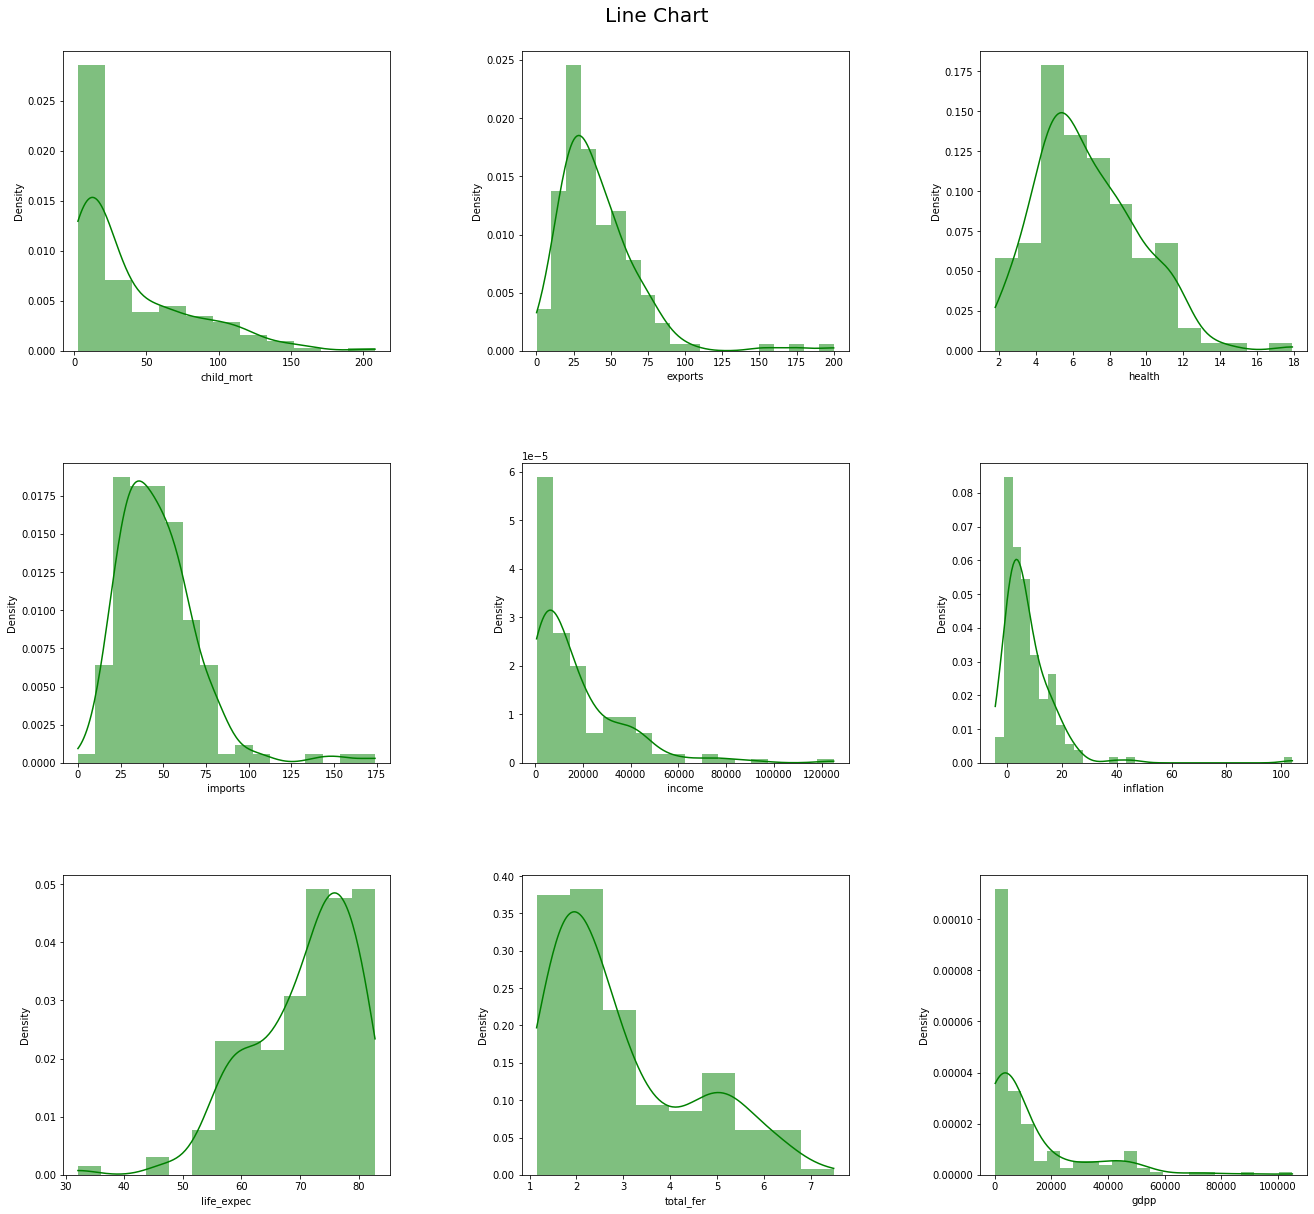

In [ ]:
histPlot(df)

##preprocessing

In [ ]:
# def dropOutliersIQR(df):
#    q1=df.quantile(0.25)
#    q3=df.quantile(0.75)
#    IQR=q3-q1
#    notOutliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

#    outliersDropped = notOutliers.dropna()

#    return outliersDropped



In [ ]:
# transDf = dropOutliersIQR(df)

In [ ]:
# transDf

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
Uzbekistan,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380.0
Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0


In [ ]:
def boxCox(df):
    lam = []
    # const =0.0000000001
    const =0.001
    # inp = df._get_numeric_data()
    # rowsize,colsize = inp.shape
    # i =1
    for col in df.columns:
        if abs(df[col].skew())>0.75:
            transformed_data, best_lambda = stats.boxcox(df[col]+abs(df.min().min())+const)
            df[col] = transformed_data
            lam.append(best_lambda)
    return df, lam

In [ ]:
# def boxCox(df):
#     lam = []
#     # const =0.0000000001
#     # inp = df._get_numeric_data()
#     # rowsize,colsize = inp.shape
#     # i =1
#     for col in df.columns:
#         if abs(df[col].skew())>0.75:
#             df[col], best_lambda = stats.boxcox(df[col]+abs(df.min().min())+const)
#             lam.append(best_lambda)
#     return df, lam

In [ ]:
transDf,lam = boxCox(df)

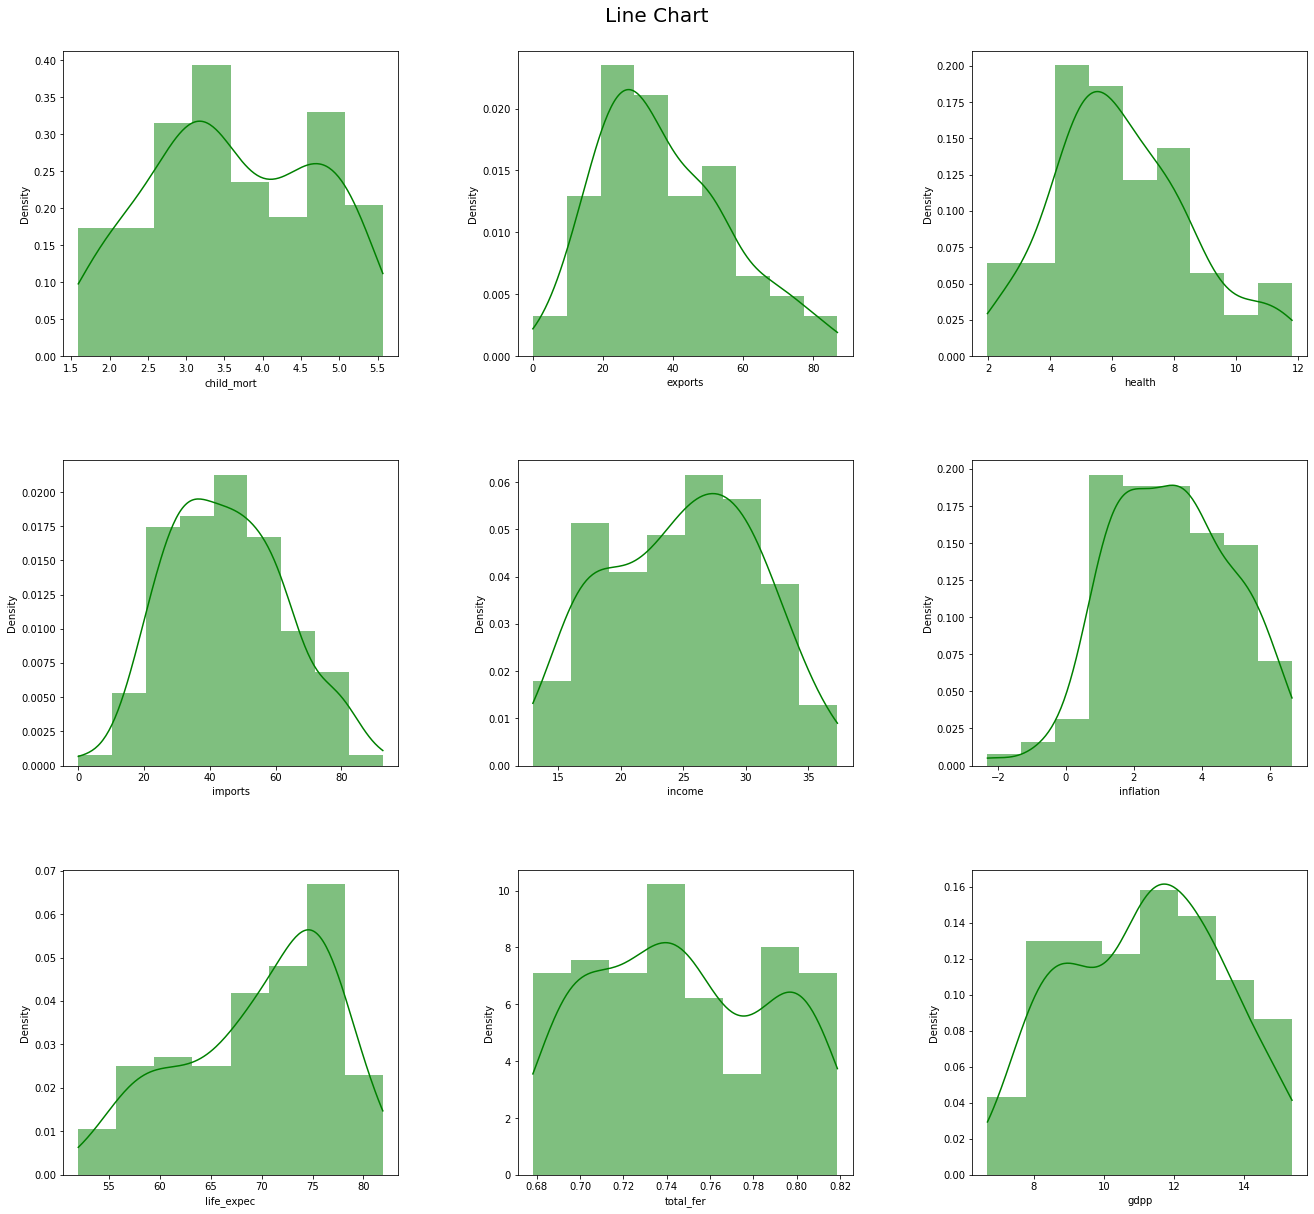

In [ ]:
histPlot(transDf)

In [ ]:
transDf.skew()

child_mort    0.062932
exports       0.030569
health        0.705746
imports       0.069233
income       -0.035718
inflation     0.418363
life_expec   -0.183188
total_fer     0.183702
gdpp          0.001392
dtype: float64

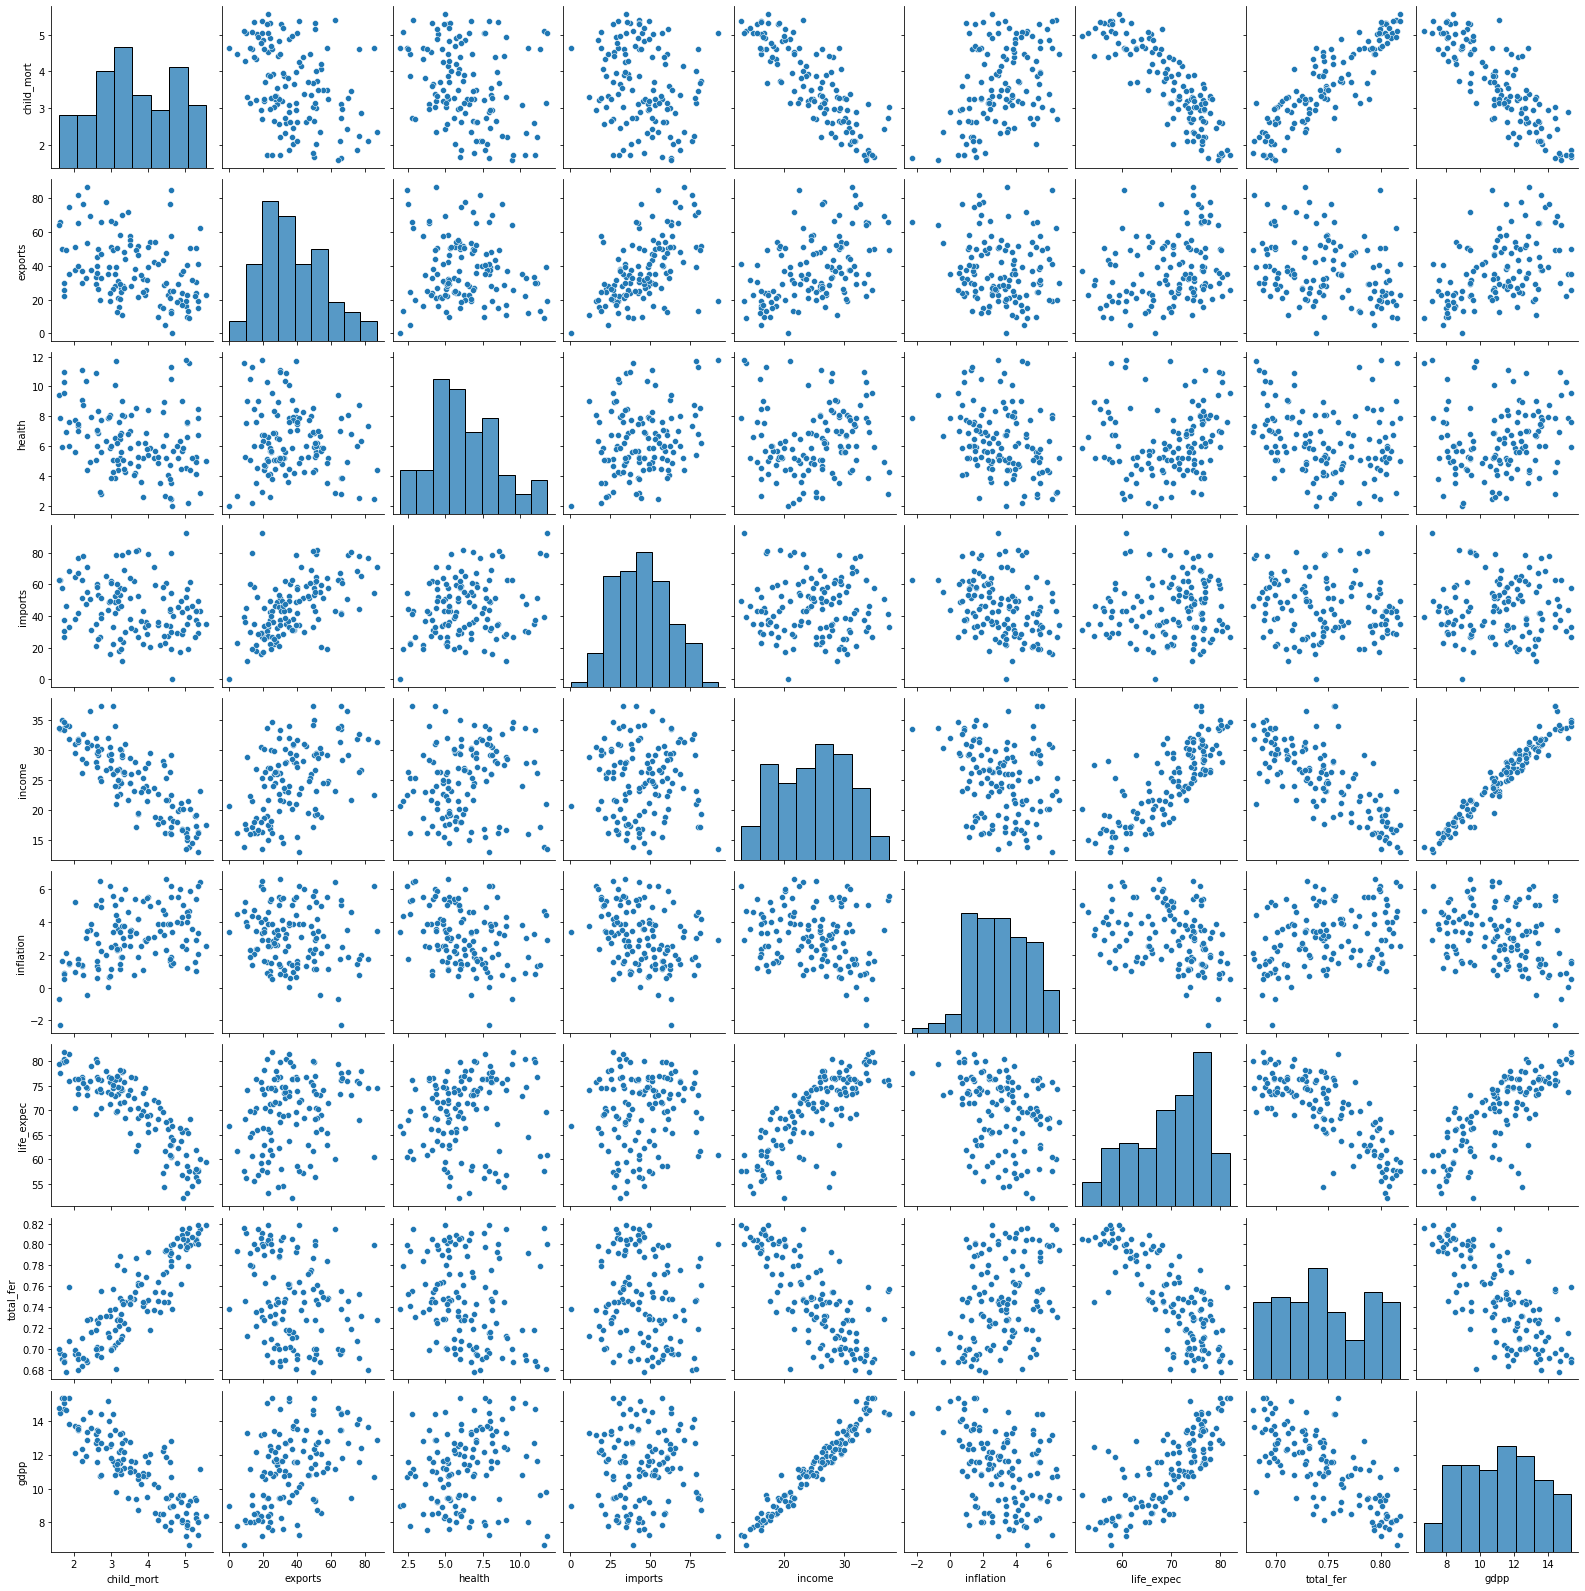

In [ ]:
sns.pairplot(transDf)


<function matplotlib.pyplot.show(*args, **kw)>

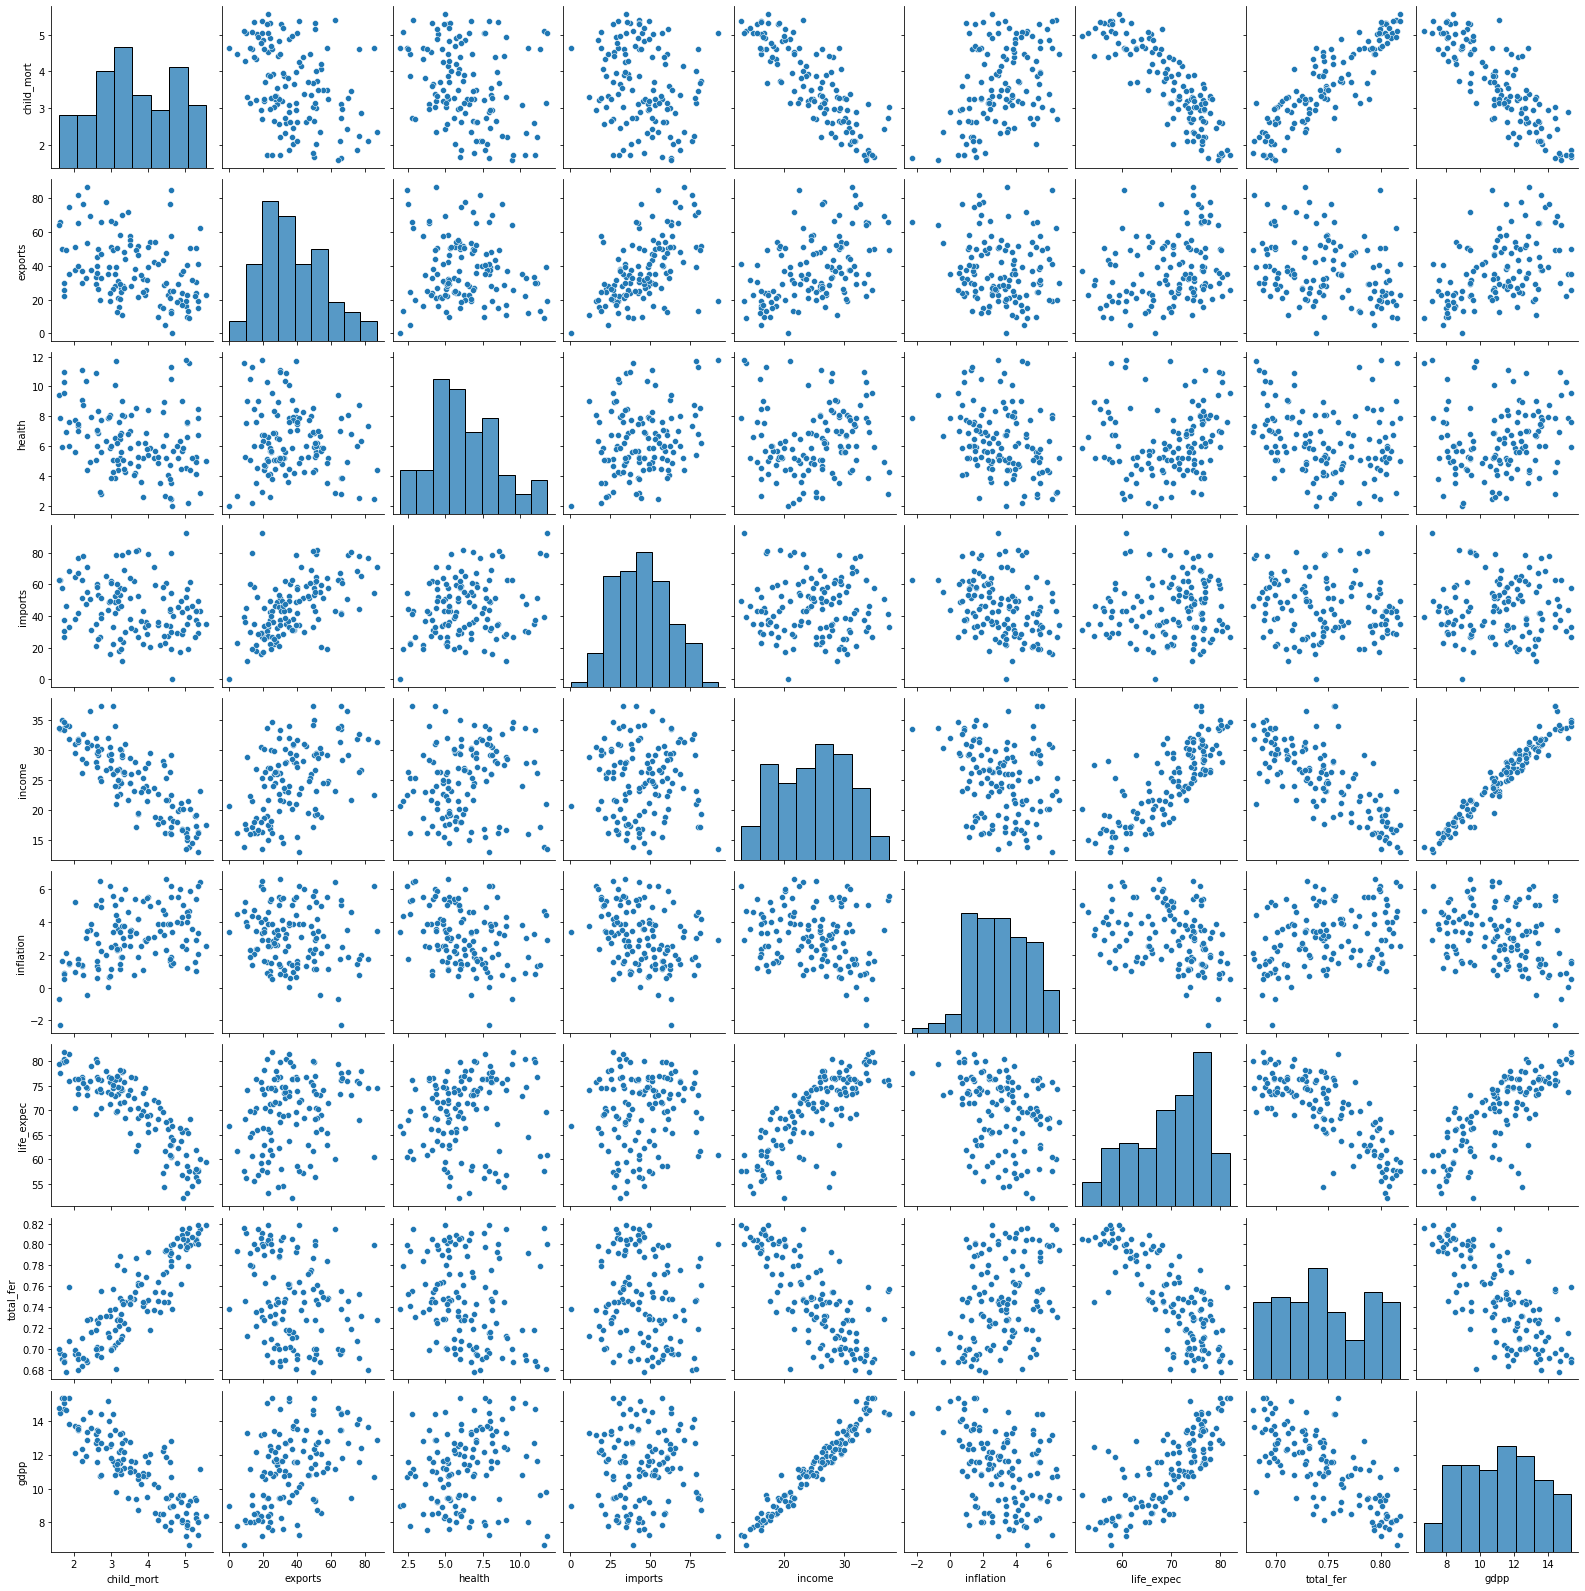

In [ ]:
sns.pairplot(transDf)
plt.show

In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000
